---
toc: false
page-layout: full
---

# Week 7A<br>Getting Data, Part 2: Working with APIs

- Section 401
- Monday Oct 16, 2023

**Week #7 Agenda**

- Introduction to APIs
- Natural language processing via Philly's 311 API
    - Word frequencies
    - Sentiment analysis
- Pulling census data and shape files using Python

::: {.callout-important}

Update your local environment!

- Small update to the course's Python environment
- Update the environment on your laptop using [these instructions](https://musa-550-fall-2023.github.io/resource/mamba.html#updating-an-existing-environment) on course website

:::

In [83]:
import geopandas as gpd
import holoviews as hv
import hvplot.pandas
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [84]:
# Show all columns
pd.options.display.max_columns = 999

## Part 1: Introduction to APIs

Or, how to pull data from the web using Python

**Application programming interface (API):**

> (noun): A particular set of rules and specifications that software programs can follow to communicate with each other and exchange data.

**Example APIs**

- Socrata Open Data: [https://dev.socrata.com/](https://dev.socrata.com/)
- Open Data Philly: [https://opendataphilly.org](https://opendataphilly.org)
- US Census Bureau: [https://www.census.gov/data/developers/data-sets.html](https://www.census.gov/data/developers/data-sets.html)
- Bureau of Labor Statistics: [https://www.bls.gov/developers/](https://www.bls.gov/developers/)
- US Geological Survey: [https://www.usgs.gov/products/data-and-tools/apis](https://www.usgs.gov/products/data-and-tools/apis)
- US Environmental Protection Agency: [https://www.epa.gov/enviro/web-services](https://www.epa.gov/enviro/web-services)
- Google APIs: [https://console.cloud.google.com/apis/library](https://console.cloud.google.com/apis/library)
- Facebook: [https://developers.facebook.com/docs/apis-and-sdks/](https://developers.facebook.com/docs/apis-and-sdks/)
- Twitter: [https://developer.twitter.com/en/docs/api-reference-index.html](https://developer.twitter.com/en/docs/api-reference-index) (RIP 💀)
- Foursquare: [https://developer.foursquare.com/](https://developer.foursquare.com/)
- Instagram: [https://www.instagram.com/developer/](https://www.instagram.com/developer/)
- Yelp: [https://www.yelp.com/developers](https://www.instagram.com/developer/)

::: {.callout-note}

When accessing data via API, many services will require you to register an API key to prevent you from overloading the service with requests.

:::

###  Example #1: Automated data feeds

The simplest form of API is when data providers maintain data files via a URL that are automatically updated with new data over time. 

#### USGS real-time earthquake feeds

This is an API for near-real-time data about earthquakes, and data is provided in GeoJSON format over the web. 

The API has a separate endpoint for each version of the data that users might want. No authentication is required.

API documentation:

[http://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php](http://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php)

Sample API endpoint, for magnitude 4.5+ earthquakes in past day:

[http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_day.geojson](http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_day.geojson)

GeoPandas can read GeoJSON files from the web directly. Simply pass the URL to the `gpd.read_file()` function:

In [85]:
# Download data on magnitude 2.5+ quakes from the past week
endpoint_url = (
    "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson"
)
earthquakes = gpd.read_file(endpoint_url)

In [86]:
earthquakes.head()

,id,mag,place,time,updated,tz,url,detail,felt,cdi,mmi,alert,status,tsunami,sig,net,code,ids,sources,types,nst,dmin,rms,gap,magType,type,title,geometry
0,us6000lg18,4.50,Mariana Islands region,1697495094131,1697496425040,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,NaN,NaN,reviewed,0,312,us,6000lg18,",us6000lg18,",",us,",",origin,phase-data,",27.0,3.168,0.46,165.0,mb,earthquake,M 4.5 - Mariana Islands region,POINT Z (147.53230 17.94240 10.00000)
1,ak023daay0wr,2.50,"Kodiak Island region, Alaska",1697491317711,1697493637040,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,NaN,NaN,automatic,0,96,ak,023daay0wr,",us6000lg02,ak023daay0wr,",",us,ak,",",origin,phase-data,",NaN,NaN,1.16,NaN,ml,earthquake,"M 2.5 - Kodiak Island region, Alaska",POINT Z (-153.12000 57.13730 0.00000)
2,ak023daavntz,2.50,"99 km SE of Old Harbor, Alaska",1697490628779,1697493347040,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,NaN,NaN,reviewed,0,96,ak,023daavntz,",us6000lg05,ak023daavntz,",",us,ak,",",origin,phase-data,",NaN,NaN,1.54,NaN,ml,earthquake,"M 2.5 - 99 km SE of Old Harbor, Alaska",POINT Z (-152.13590 56.57760 15.00000)
3,hv73610612,2.86,"21 km W of Volcano, Hawaii",1697485792740,1697487909640,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,NaN,NaN,reviewed,0,126,hv,73610612,",us6000lfz9,hv73610612,",",us,hv,",",origin,phase-data,",53.0,NaN,0.12,68.0,ml,earthquake,"M 2.9 - 21 km W of Volcano, Hawaii",POINT Z (-155.44050 19.46667 6.83000)
4,us6000lfyi,4.30,"La Rioja-San Juan border region, Argentina",1697482144060,1697483277040,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,NaN,NaN,reviewed,0,284,us,6000lfyi,",us6000lfyi,",",us,",",moment-tensor,origin,phase-data,",48.0,1.728,1.08,81.0,mwr,earthquake,"M 4.3 - La Rioja-San Juan border region, Argen...",POINT Z (-68.25610 -29.32270 39.71600)


Let's explore the data interactively with Folium:

In [87]:
earthquakes.explore()

Lots of other automated feeds available, updated every minute:


![](imgs/usgs-1.png){width=312}
![](imgs/usgs-2.png){width=300}


### Example #2: The CARTO API

- Philadelphia hosts the majority of its open data on OpenDataPhilly in the cloud using CARTO
- They provide an API to download the data
- You can access the API documentation on the dataset page on OpenDataPhilly

For example: shooting victims in Philadelphia

[https://www.opendataphilly.org/dataset/shooting-victims](https://www.opendataphilly.org/dataset/shooting-victims)

and the API documentation:

[https://cityofphiladelphia.github.io/carto-api-explorer/#shootings](https://cityofphiladelphia.github.io/carto-api-explorer/#shootings)

Let's take a look at the download URL for the data in the GeoJSON format:

![](imgs/shooting-victims-api.png){width=500}


#### The anatomy of an API request

![](imgs/carto-api.png){width="900"}



- **Base URL**: shown in blue
- **?**: shown in purple; it separates the base URL from the query parameters
- **Query parameters**: underlined in red; these parameters allow the user to customize the data response
- **&**: underlined in green; the separator between the query parameters

So, let's break down the URL into its component parts:

In [88]:
# The API endpoint
carto_api_endpoint = "https://phl.carto.com/api/v2/sql"

# The query parameters
params = {
    "q": "SELECT * FROM shootings",
    "format": "geojson",
    "skipfields": "cartodb_id",
    # Note: we won't need the filename parameter, since we're not saving the data to a file
    # "filename": "shootings"
}

::: {.callout-note}
### Note: SQL Queries

The `q` parameter is a *SQL query*. It allows you to select a specific subset of data from the larger database.

CARTO API documentation: [https://carto.com/developers/sql-api/](https://carto.com/developers/sql-api/)

SQL documentation: [https://www.postgresql.org/docs/9.1/sql.html](https://www.postgresql.org/docs/9.1/sql.html)

**General Query Syntax**

`SELECT [field names] FROM [table name] WHERE [query]`
:::

#### Let's try it out in Python

We'll use Python's `requests` library to use a "get" request to query the API endpoint with our desired query. Similar to our web scraping requests!

In [89]:
import requests

Let's make the get request and pass the query parameters via the `params` keyword:

In [90]:
response = requests.get(carto_api_endpoint, params=params)

response

<Response [200]>

In [91]:
# Get the returned data in JSON format
# This is a dictionary
features = response.json()

In [92]:
type(features)

dict

In [93]:
# What are the keys?
list(features.keys())

['type', 'features']

In [94]:
features["type"]

'FeatureCollection'

In [95]:
# Let's look at the first feature
features["features"][0]

{'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [-75.162274, 39.988715]},
 'properties': {'objectid': 10797984,
  'year': 2020,
  'dc_key': '202022062735.0',
  'code': '411',
  'date_': '2020-09-12T00:00:00Z',
  'time': '21:04:00',
  'race': 'W',
  'sex': 'M',
  'age': '53',
  'wound': 'Foot',
  'officer_involved': 'N',
  'offender_injured': 'N',
  'offender_deceased': 'N',
  'location': '18TH & DAUPHIN ST',
  'latino': 1,
  'point_x': -75.16227376,
  'point_y': 39.98871456,
  'dist': '22',
  'inside': 0,
  'outside': 1,
  'fatal': 0}}

Use the `GeoDataFrame.from_features()` function to create a GeoDataFrame.

In [96]:
shootings = gpd.GeoDataFrame.from_features(features, crs="EPSG:4326")


::: {.callout-important}
Don't forget to specify the CRS of the input data when using `GeoDataFrame.from_features()`.
:::

In [97]:
shootings.head()

,geometry,objectid,year,dc_key,code,date_,time,race,sex,age,wound,officer_involved,offender_injured,offender_deceased,location,latino,point_x,point_y,dist,inside,outside,fatal
0,POINT (-75.16227 39.98871),10797984,2020,202022062735.0,411,2020-09-12T00:00:00Z,21:04:00,W,M,53,Foot,N,N,N,18TH & DAUPHIN ST,1.0,-75.162274,39.988715,22,0.0,1.0,0.0
1,POINT (-75.14885 39.98795),10797985,2020,202022062782.0,111,2020-09-13T00:00:00Z,10:50:00,W,M,22,Multiple/Head,N,N,N,1000 BLOCK W ARIZONA ST,0.0,-75.148851,39.987952,22,0.0,1.0,1.0
2,POINT (-75.16062 39.98691),10797986,2020,202022063114.0,411,2020-09-14T00:00:00Z,20:46:00,B,M,42,Multiple,N,N,N,1600 BLOCK SUSQUEHANNA AVE,0.0,-75.160616,39.986907,22,0.0,1.0,0.0
3,POINT (-75.16062 39.98691),10797987,2020,202022063126.0,411,2020-09-14T00:00:00Z,20:46:00,B,M,17,Buttocks,N,N,N,1600 BLOCK SUSQUEHANNA AVE,0.0,-75.160616,39.986907,22,0.0,1.0,0.0
4,POINT (-75.15398 39.98373),10797988,2020,202022063470.0,111,2020-09-16T00:00:00Z,12:10:00,B,M,39,Head,N,N,N,2000 BLOCK W SUSQUEHANNA AVE,0.0,-75.153980,39.983726,22,0.0,1.0,1.0


#### At-Home Exercise: Visualizing shootings data

**Step 1: Prep the data**

- Drop rows where the geometry is NaN
- Convert to a better CRS (e.g., 3857)
- Load city limits from Open Data Philly and trim to those only within city limits (some shootings have wrong coordinates, outside Philadelphia!)

In [98]:
# make sure we remove missing geometries
shootings = shootings.dropna(subset=["geometry"])

# convert to a better CRS
shootings = shootings.to_crs(epsg=3857)

In [99]:
city_limits = gpd.read_file(
    "https://opendata.arcgis.com/datasets/405ec3da942d4e20869d4e1449a2be48_0.geojson"
).to_crs(epsg=3857)

In [100]:
# Remove any shootings that are outside the city limits
shootings = gpd.sjoin(shootings, city_limits, predicate="within", how="inner").drop(
    columns=["index_right"]
)

**Step 2: Plot the points**

A quick plot with geopandas to show the shootings as points, and overlay Philadelphia ZIP codes.

In [101]:
# From Open Data Philly
zip_codes = gpd.read_file(
    "https://opendata.arcgis.com/datasets/b54ec5210cee41c3a884c9086f7af1be_0.geojson"
).to_crs(epsg=3857)

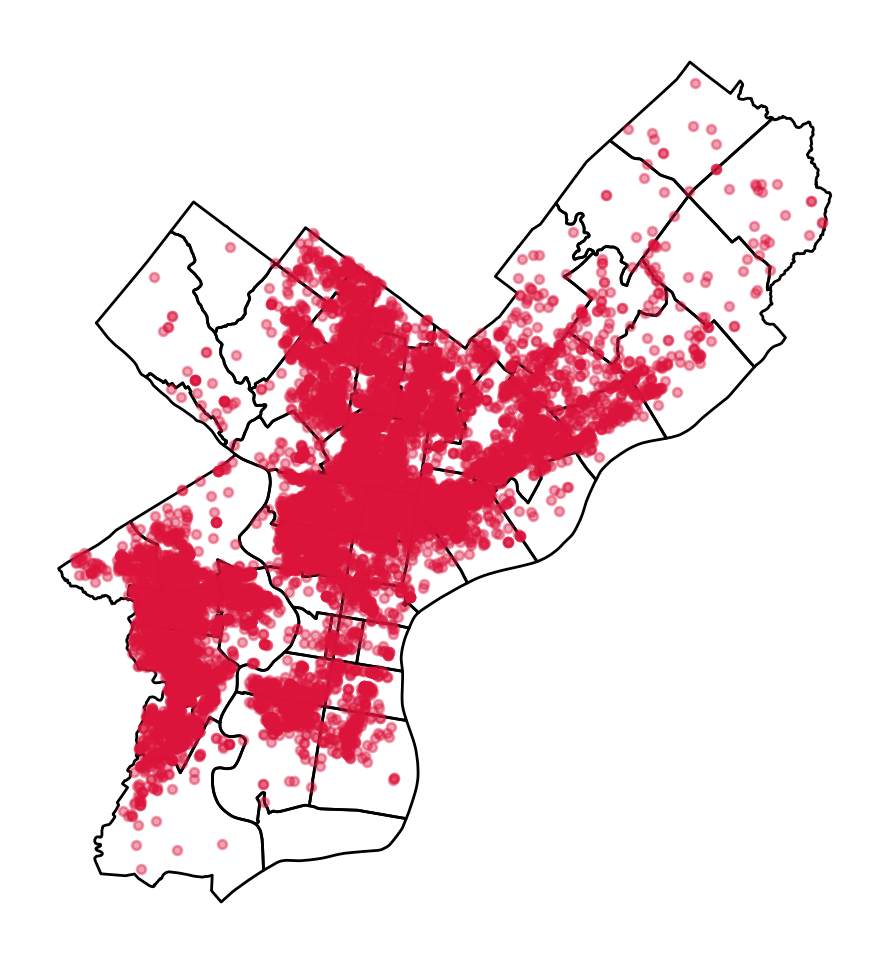

In [102]:
fig, ax = plt.subplots(figsize=(6, 6))

# ZIP Codes
zip_codes.to_crs(epsg=3857).plot(ax=ax, facecolor="none", edgecolor="black")

# Shootings
shootings.plot(ax=ax, color="crimson", markersize=10, alpha=0.4)
ax.set_axis_off()

**Step 3: Make a (more useful) hex bin map**

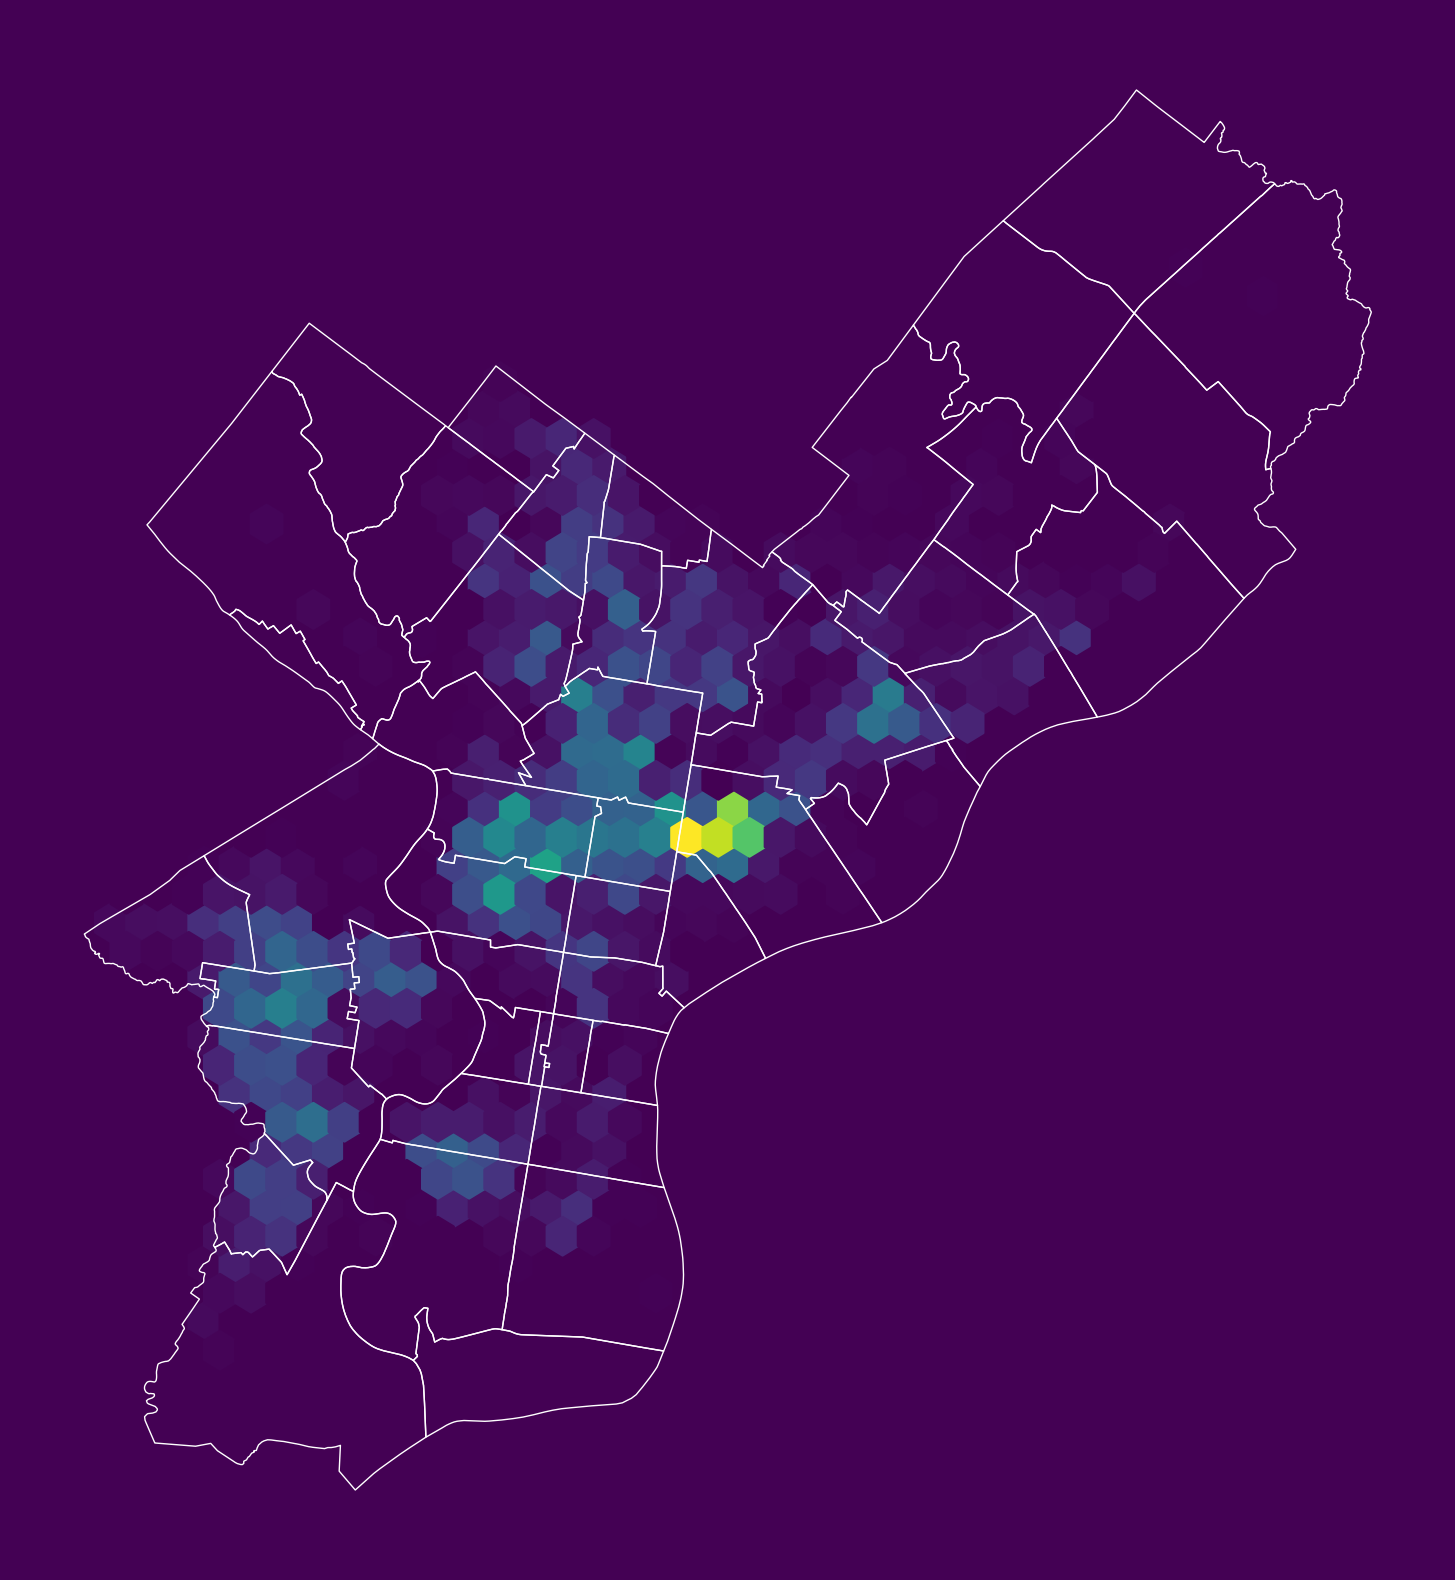

In [103]:
# Initialize the axes
fig, ax = plt.subplots(figsize=(10, 10), facecolor=plt.get_cmap("viridis")(0))

# Convert to Web Mercator and plot the hexbins
x = shootings.geometry.x
y = shootings.geometry.y
ax.hexbin(x, y, gridsize=40, mincnt=1, cmap="viridis")

# overlay the city limits
zip_codes.to_crs(epsg=3857).plot(
    ax=ax, facecolor="none", linewidth=0.5, edgecolor="white"
)

ax.set_axis_off()

#### Example: Count the total number of rows in a table

The SQL `COUNT` function can be applied to count all rows.

In [104]:
response = requests.get(
    carto_api_endpoint, params={"q": "SELECT COUNT(*) FROM shootings"}
)

In [105]:
response.json()

{'rows': [{'count': 15096}],
 'time': 0.006,
 'fields': {'count': {'type': 'number', 'pgtype': 'int8'}},
 'total_rows': 1}

::: {.callout-tip}
It's always a good idea to check how many rows you might be downloading before requesting all of the data from an API!
:::

#### Example: Select all columns, limiting the total number returned

The `LIMIT` function limits the number of returned rows. It is very useful for taking a quick look at the format of a database.

In [106]:
# Limit the returned data to only 1 row
query = "SELECT * FROM shootings LIMIT 1"

# Make the request
params = {"q": query, "format": "geojson"}
response = requests.get(carto_api_endpoint, params=params)

Create the GeoDataFrame:

In [107]:
df = gpd.GeoDataFrame.from_features(response.json(), crs="EPSG:4326")

df

,geometry,cartodb_id,objectid,year,dc_key,code,date_,time,race,sex,age,wound,officer_involved,offender_injured,offender_deceased,location,latino,point_x,point_y,dist,inside,outside,fatal
0,POINT (-75.16227 39.98871),1,10797984,2020,202022062735.0,411,2020-09-12T00:00:00Z,21:04:00,W,M,53,Foot,N,N,N,18TH & DAUPHIN ST,1,-75.162274,39.988715,22,0,1,0


#### Example: Select by specific column values

Use the `WHERE` function to select a subset where the logical condition is true.

Example #1: Select nonfatal shootings only

In [108]:
# Select nonfatal shootings only
query = "SELECT * FROM shootings WHERE fatal = 0"

In [109]:
# Make the request
params = {"q": query, "format": "geojson"}
response = requests.get(carto_api_endpoint, params=params)

# Make the GeoDataFrame
nonfatal = gpd.GeoDataFrame.from_features(response.json(), crs="EPSG:4326")

# Print
print("number of nonfatal shootings = ", len(nonfatal))

number of nonfatal shootings =  11878


Example #2: Select shootings in 2023

In [110]:
# Select based on "date_"
query = "SELECT * FROM shootings WHERE date_ >= '1/1/23'"

In [111]:
# Make the request
params = {"q": query, "format": "geojson"}
response = requests.get(carto_api_endpoint, params=params)

# Make the GeoDataFrame
shootings_2023 = gpd.GeoDataFrame.from_features(response.json(), crs="EPSG:4326")

# Print
print("number of shootings in 2023 = ", len(shootings_2023))

number of shootings in 2023 =  1413


#### At-Home Exercise: Explore trends by month and day of week

##### Step 1: Convert the date column to `DateTime` objects

Add Month and Day of Week columns

In [112]:
# Condddvert the data column to a datetime object
shootings["date"] = pd.to_datetime(shootings["date_"])

In [113]:
# Add new columns: Month and Day of Week
shootings["Month"] = shootings["date"].dt.month
shootings["Day of Week"] = shootings["date"].dt.dayofweek  # Monday is 0, Sunday is 6

##### Step 2: Calculate number of shootings by month and day of week

Use the familiar Groupby --> size()

In [114]:
count = shootings.groupby(["Month", "Day of Week"]).size()
count = count.reset_index(name="Count")
count.head()

,Month,Day of Week,Count
0,1,0,168
1,1,1,157
2,1,2,143
3,1,3,139
4,1,4,143


##### Step 3: Make a heatmap using `hvplot`

In [115]:
# Remember 0 is Monday and 6 is Sunday
count.hvplot.heatmap(
    x="Day of Week",
    y="Month",
    C="Count",
    cmap="viridis",
    width=400,
    height=500,
    flip_yaxis=True,
)

:HeatMap   [Day of Week,Month]   (Count)

**Trends:** more shootings on the weekends and in the summer months

### Example #3: GeoServices

A GeoService is a standardized format for returning GeoJSON files over the web

Originally developed by Esri, in 2010 the specification was transferred to the Open Web Foundation.

Documentation: [http://geoservices.github.io/](http://geoservices.github.io/)

#### Example: Philadelphia neighborhoods

OpenDataPhilly provides GeoService API endpoints for the geometry hosted on its platform

[https://opendataphilly.org/datasets/philadelphia-neighborhoods/](https://opendataphilly.org/datasets/philadelphia-neighborhoods/)

In [116]:
# The base URL for the neighborhoods layer
neighborhood_url = "https://services1.arcgis.com/a6oRSxEw6eIY5Zfb/arcgis/rest/services/Philadelphia_Neighborhoods/FeatureServer/0"

![](imgs/geoservices-1.png){width="800"}

Source: [https://geoservices.github.io/resources.html](https://geoservices.github.io/resources.html)

#### The `query/` endpoint

Layers have a single endpoint for requesting features: the `/query` endpoint.


In [117]:
neighborhood_query_endpoint = neighborhood_url + "/query"

In [118]:
neighborhood_query_endpoint

'https://services1.arcgis.com/a6oRSxEw6eIY5Zfb/arcgis/rest/services/Philadelphia_Neighborhoods/FeatureServer/0/query'

#### The allowed parameters

The main request parameters are:

- `where`: A SQL-like string to select a subset of features; to get all data, use `1=1` (always True)
- `outFields`: The list of columns to return; to get all, use `*`
- `f`: The returned format; for GeoJSON, use "geojson"
- `outSR`: The desired output CRS

In [119]:
params = {
    "where": "1=1",  # Give me all rows
    "outFields": "*",  # All fields
    "f": "geojson",  # GeoJSON format
    "outSR": "4326",  # The desired output CRS
}

Make the request:

In [120]:
r = requests.get(neighborhood_query_endpoint, params=params)

Get the features and create the GeoDataFrame:

In [121]:
json = r.json()

features = json["features"]

In [122]:
hoods = gpd.GeoDataFrame.from_features(features, crs="EPSG:4326")

In [123]:
hoods

,geometry,FID,NAME,LISTNAME,MAPNAME,Shape_Leng,Shape__Area,Shape__Length
0,"POLYGON ((-75.06773 40.00540, -75.06765 40.005...",1,BRIDESBURG,Bridesburg,Bridesburg,27814.546521,7.066581e+06,11074.587308
1,"POLYGON ((-75.01560 40.09487, -75.01768 40.092...",2,BUSTLETON,Bustleton,Bustleton,48868.458365,1.812721e+07,19485.686530
2,"POLYGON ((-75.18848 40.07273, -75.18846 40.072...",3,CEDARBROOK,Cedarbrook,Cedarbrook,20021.415802,3.950980e+06,7980.051802
3,"POLYGON ((-75.21221 40.08603, -75.21211 40.086...",4,CHESTNUT_HILL,Chestnut Hill,Chestnut Hill,56394.297195,1.265385e+07,22476.270236
4,"POLYGON ((-75.18479 40.02837, -75.18426 40.027...",5,EAST_FALLS,East Falls,East Falls,27400.776417,6.434879e+06,10907.970158
...,...,...,...,...,...,...,...,...
153,"POLYGON ((-75.18373 39.91351, -75.18194 39.913...",154,PACKER_PARK,Packer Park,Packer Park,21816.017948,4.584862e+06,8444.679631
154,"POLYGON ((-75.14654 39.93005, -75.14804 39.921...",155,PENNSPORT,Pennsport,Pennsport,11823.233108,1.026917e+06,4706.597865
155,"POLYGON ((-75.16986 39.92312, -75.17015 39.921...",156,NEWBOLD,Newbold,Newbold,10052.570885,9.281435e+05,3994.098029
156,"POLYGON ((-75.17630 39.92425, -75.17798 39.923...",157,WEST_PASSYUNK,West Passyunk,West Passyunk,10499.291848,1.027608e+06,4173.301421


Now let's select data just for East Falls and subset the returned columns:

In [124]:
params = {
    "where": "LISTNAME = 'East Falls'",
    "outFields": ["LISTNAME"],
    "f": "geojson",
    "outSR": "4326",
}

r = requests.get(neighborhood_query_endpoint, params=params)

In [125]:
east_falls = gpd.GeoDataFrame.from_features(r.json()["features"], crs="EPSG:4326")

east_falls

,geometry,LISTNAME
0,"POLYGON ((-75.18479 40.02837, -75.18426 40.027...",East Falls


## Part 2: Natural Language Processing and the 311 Request API

In part two, we'll pull data using the API for the Philly 311 system, available at: [https://iframe.publicstuff.com/#?client_id=242](https://iframe.publicstuff.com/#?client_id=242)

We saw this site previously when we talked about web scraping last week:

![](imgs/philly-311.png)

Let's take another look at the address where the site is pulling its data from:

`https://vc0.publicstuff.com/api/2.0/requests_list?client_id=242&device=iframe&limit=35&page=1`


This is just an **API request!** It's an example of a *non-public, internal* API, but we can reverse-engineer it to extract the data we want!

Break it down into it's component parts:

- **Base URL:** [https://vc0.publicstuff.com/api/2.0/requests_list](https://vc0.publicstuff.com/api/2.0/requests_list)
- **Query parameters:** client_id, device, limit, page

It looks likes "client_id" identifies data for the City of Philadelphia, which is definitely a required parameter. Otherwise, the other parameters seem optional, returning the requests on a certain device and viewing page.

Let's test it out. We'll grab 2 requests from the first page:

In [126]:
r = requests.get(
    "https://vc0.publicstuff.com/api/2.0/requests_list",
    params={"client_id": 242, "page": 1, "limit": 2},
)

json = r.json()

json

{'response': {'requests': [{'request': {'id': 14500812,
     'image_thumbnail': '',
     'title': 'Traffic Sign Complaint',
     'description': 'People speed up the street like they’re all 95 it needs to have street cushions put in or speed bumps whatever you wanna call',
     'status': 'submitted',
     'address': '3532 Mercer St,Philadelphia, PA 19134',
     'location': 'Philadelphia, Pennsylvania',
     'zipcode': '19134',
     'foreign_id': '16306373',
     'date_created': 1697500549,
     'count_comments': 0,
     'count_followers': 0,
     'count_supporters': 0,
     'lat': 39.98944,
     'lon': -75.095472,
     'user_follows': 0,
     'user_comments': 0,
     'user_request': 0,
     'rank': '1',
     'user': 'Lisa BUCHER'}},
   {'request': {'primary_attachment': {'id': 4618920,
      'extension': 'jpeg',
      'content_type': 'image/jpeg',
      'url': 'https://d17aqltn7cihbm.cloudfront.net/uploads/021404250e358776466e2a1eed0b37b7',
      'versions': {'small': 'https://d17aqltn7

Now we need to understand the structure of the response. First, access the list of requests:

In [127]:
request_list = json["response"]["requests"]

request_list

[{'request': {'id': 14500812,
   'image_thumbnail': '',
   'title': 'Traffic Sign Complaint',
   'description': 'People speed up the street like they’re all 95 it needs to have street cushions put in or speed bumps whatever you wanna call',
   'status': 'submitted',
   'address': '3532 Mercer St,Philadelphia, PA 19134',
   'location': 'Philadelphia, Pennsylvania',
   'zipcode': '19134',
   'foreign_id': '16306373',
   'date_created': 1697500549,
   'count_comments': 0,
   'count_followers': 0,
   'count_supporters': 0,
   'lat': 39.98944,
   'lon': -75.095472,
   'user_follows': 0,
   'user_comments': 0,
   'user_request': 0,
   'rank': '1',
   'user': 'Lisa BUCHER'}},
 {'request': {'primary_attachment': {'id': 4618920,
    'extension': 'jpeg',
    'content_type': 'image/jpeg',
    'url': 'https://d17aqltn7cihbm.cloudfront.net/uploads/021404250e358776466e2a1eed0b37b7',
    'versions': {'small': 'https://d17aqltn7cihbm.cloudfront.net/uploads/small_021404250e358776466e2a1eed0b37b7',
    

We need to extract out the "request" key of each list entry. Let's do that and create a DataFrame:

In [128]:
data = pd.DataFrame([r["request"] for r in request_list])

In [129]:
data.head()

,id,image_thumbnail,title,description,status,address,location,zipcode,foreign_id,date_created,count_comments,count_followers,count_supporters,lat,lon,user_follows,user_comments,user_request,rank,user,primary_attachment
0,14500812,,Traffic Sign Complaint,People speed up the street like they’re all 95...,submitted,"3532 Mercer St,Philadelphia, PA 19134","Philadelphia, Pennsylvania",19134,16306373,1697500549,0,0,0,39.989440,-75.095472,0,0,0,1,Lisa BUCHER,NaN
1,14500796,https://d17aqltn7cihbm.cloudfront.net/uploads/...,Abandoned Automobile,This vehicle has been parked on the 5300 block...,submitted,"5414 B St, Philadelphia, PA 19120, USA",,None,16306368,1697500317,0,0,0,40.032428,-75.118470,0,0,0,1,,"{'id': 4618920, 'extension': 'jpeg', 'content_..."


Success! But we want to build up a larger dataset...let's pull data for the first 3 pages of data. This will take a minute or two...

In [130]:
# Store the data we request
data = []

# Total number of pages
total_pages = 3

# Loop over each page
for page_num in range(1, total_pages + 1):
    # Print out the page number
    print(f"Getting data for page #{page_num}...")

    # Make the request
    r = requests.get(
        "https://vc0.publicstuff.com/api/2.0/requests_list",
        params={
            "client_id": 242,  # Unique identifier for Philadelphia
            "page": page_num,  # What page of data to pull
            "limit": 200,  # How many rows per page
        },
    )

    # Get the json
    d = r.json()

    # Add the new data to our list and save
    data = data + [r["request"] for r in d["response"]["requests"]]

# Create a dataframe
data = pd.DataFrame(data)

Getting data for page #1...
Getting data for page #2...
Getting data for page #3...


In [131]:
len(data)

600

In [132]:
data.head()

,primary_attachment,id,image_thumbnail,title,description,status,address,location,zipcode,foreign_id,date_created,count_comments,count_followers,count_supporters,lat,lon,user_follows,user_comments,user_request,rank,user
0,"{'id': 4619003, 'extension': 'jpg', 'content_t...",14500990,https://d17aqltn7cihbm.cloudfront.net/uploads/...,Graffiti Removal,"On the side of the house, the side facing Wood...",submitted,"1320 S Markoe St, Philadelphia, PA 19143, USA",,None,16306421,1697503690,0,0,0,39.943466,-75.209642,0,0,0,1,WalkAbout
1,NaN,14500986,,Homeless Encampment,There is a growing encampment near my house. T...,submitted,"2037 S Broad St, Philadelphia, PA 19148, USA",,None,16306417,1697503541,0,0,0,39.924470,-75.169041,0,0,0,1,jimmy.qaqish
2,"{'id': 4618993, 'extension': 'jpg', 'content_t...",14500969,https://d17aqltn7cihbm.cloudfront.net/uploads/...,Graffiti Removal,On the west side of S. Markoe Street across fr...,submitted,"1305 S Markoe St, Philadelphia, PA 19143, USA",,None,16306412,1697503108,0,0,0,39.943874,-75.209812,0,0,0,1,WalkAbout
3,NaN,14500967,,Abandoned Automobile,The trailer has been parked on the corner sinc...,submitted,"2535 E Ontario St, Philadelphia, PA 19134, USA",,None,16306411,1697503064,0,0,0,39.988810,-75.099584,0,0,0,1,cebonfan
4,NaN,14500963,,Abandoned Automobile,Parked on the sidewalk for over 6 months,submitted,"2634 Sears St, Philadelphia, PA 19146, USA",,None,16306410,1697502982,0,0,0,39.936311,-75.188364,0,0,0,1,


Let's focus on the "description" column. This is the narrative text that the user inputs when entering a 311 request, and it is an example of *semi-structured* data. For the rest of today, we'll focus on how to extract information from semi-structured data.

### Semi-structured data

Data that contains some elements that cannot be easily consumed by computers 

**Examples:** human-readable text, audio, images, etc

### Key challenges

- **Text mining**: analyzing blocks of text to extract the relevant pieces of information
- **Natural language processing (NLP)**: programming computers to process and analyze human languages
- **Sentiment analysis**: analyzing blocks of text to derive the attitude or emotional state of the person

::: {.callout-note}
Twitter is one of the main API examples of semi-structured data, but since Elon Musk overhauled the API access, it's become prohibitively expensive to access (RIP 💀)
:::

To get started, let's remove any requests where the description is missing:

In [133]:
data = data.dropna(subset=["description"])
data_final = data.loc[data["description"] != ""]

In [134]:
# Strip out spaces and convert to a list
descriptions = data_final["description"].str.strip().tolist()

descriptions[:10]

['On the side of the house, the side facing Woodland Avenue.',
 'There is a growing encampment near my house. The people there have broken into a fenced area. They are yelling, leaving trash, defecating, and attempting to open cars on the street.',
 'On the west side of S. Markoe Street across from #1305.',
 'The trailer has been parked on the corner since the summer and has not moved. The street facing tires are flat. The trailer seems abandoned.',
 'Parked on the sidewalk for over 6 months',
 'The street light in front of 8219 Fayette st was out last night and is still out tonight. It very, very dark!',
 'On the southwest corner of the intersection of S. 46th Street and Woodland Avenue.',
 "On the 'No Dumping' street sign on the south side of Cedar Avenue about 11 steps west of S. 46th Street. Next to the tiny park.",
 'Apartment complex is dumping trash on our street again! Please help or tell me the proper channels I need to take. Thank you!',
 'People speed up the street like they

### Use case #1: calculating word frequencies

An example of **text mining**

#### Text mining and dealing with messy data

Some steps to clean up our text data:

1. Break strings into words
1. Remove capitalization
1. Remove stop words
1. Remove punctuation

**1. Break strings into words**

Use the `.split()` command to break a string into words by splitting on spaces.

In [135]:
example_string = "This is an Example"

example_string.split()

['This', 'is', 'an', 'Example']

In [136]:
descriptions_words = [desc.split() for desc in descriptions]

In [137]:
descriptions_words[0]

['On',
 'the',
 'side',
 'of',
 'the',
 'house,',
 'the',
 'side',
 'facing',
 'Woodland',
 'Avenue.']

This is a list of lists, e.g., the first element is a list of words. Let's *flatten* this into a list of just words:

In [138]:
descriptions_words_flat = []

for list_of_words in descriptions_words:
    for word in list_of_words:
        descriptions_words_flat.append(word)

In [139]:
descriptions_words_flat[0]

'On'

In [140]:
len(descriptions_words_flat)

9370

**2. Convert all words to lower case**

Use `.lower()` makes all words lower cased

In [141]:
descriptions_words_lower = [word.lower() for word in descriptions_words_flat]

In [142]:
descriptions_words_lower[:10]

['on',
 'the',
 'side',
 'of',
 'the',
 'house,',
 'the',
 'side',
 'facing',
 'woodland']

In [143]:
len(descriptions_words_lower)

9370

**3. Remove stop words**

Common words that do not carry much significance and are often ignored in text analysis.

We can use the `nltk` package.

The "Natural Language Toolkit" https://www.nltk.org/

Import and download the stop words:

In [144]:
import nltk

nltk.download("stopwords");

[nltk_data] Downloading package stopwords to /Users/nhand/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Get the list of common stop words:

In [145]:
stop_words = list(set(nltk.corpus.stopwords.words("english")))

stop_words[:10]

["wasn't",
 'will',
 'for',
 'ourselves',
 'while',
 'during',
 'your',
 'here',
 'some',
 "that'll"]

In [146]:
len(stop_words)

179

In [147]:
descriptions_no_stop = []

for word in descriptions_words_lower:
    if word not in stop_words:
        descriptions_no_stop.append(word)

In [148]:
descriptions_no_stop = [
    word for word in descriptions_words_lower if word not in stop_words
]

In [149]:
len(descriptions_no_stop)

5439

**4. Remove punctuation**

Get the list of common punctuation:

In [150]:
import string

In [151]:
punctuation = list(string.punctuation)

In [152]:
punctuation[:5]

['!', '"', '#', '$', '%']

Remove punctuation from words:

In [153]:
descriptions_final = []

# Loop over all words
for word in descriptions_no_stop:
    # Remove any punctuation from the words
    for p in punctuation:
        word = word.replace(p, "")

    # Save it if the string is not empty
    if word != "":
        descriptions_final.append(word)

Convert to a Dataframe with one column:

In [154]:
words = pd.DataFrame({"words": descriptions_final})

In [155]:
words.head()

,words
0,side
1,house
2,side
3,facing
4,woodland


**Calculate the word frequencies** 

Use a pandas groupby and sort to put in descending order:

In [156]:
N = (
    words.groupby("words", as_index=False)
    .size()
    .sort_values("size", ascending=False, ignore_index=True)
)

The top 15 words by frequency:

In [157]:
top15 = N.head(15)

top15

,words,size
0,street,145
1,trash,113
2,side,66
3,block,40
4,vehicle,39
5,sidewalk,38
6,please,38
7,property,35
8,lot,35
9,corner,34


**Plot the frequencies**

Use `seaborn` to plot our DataFrame of word counts...

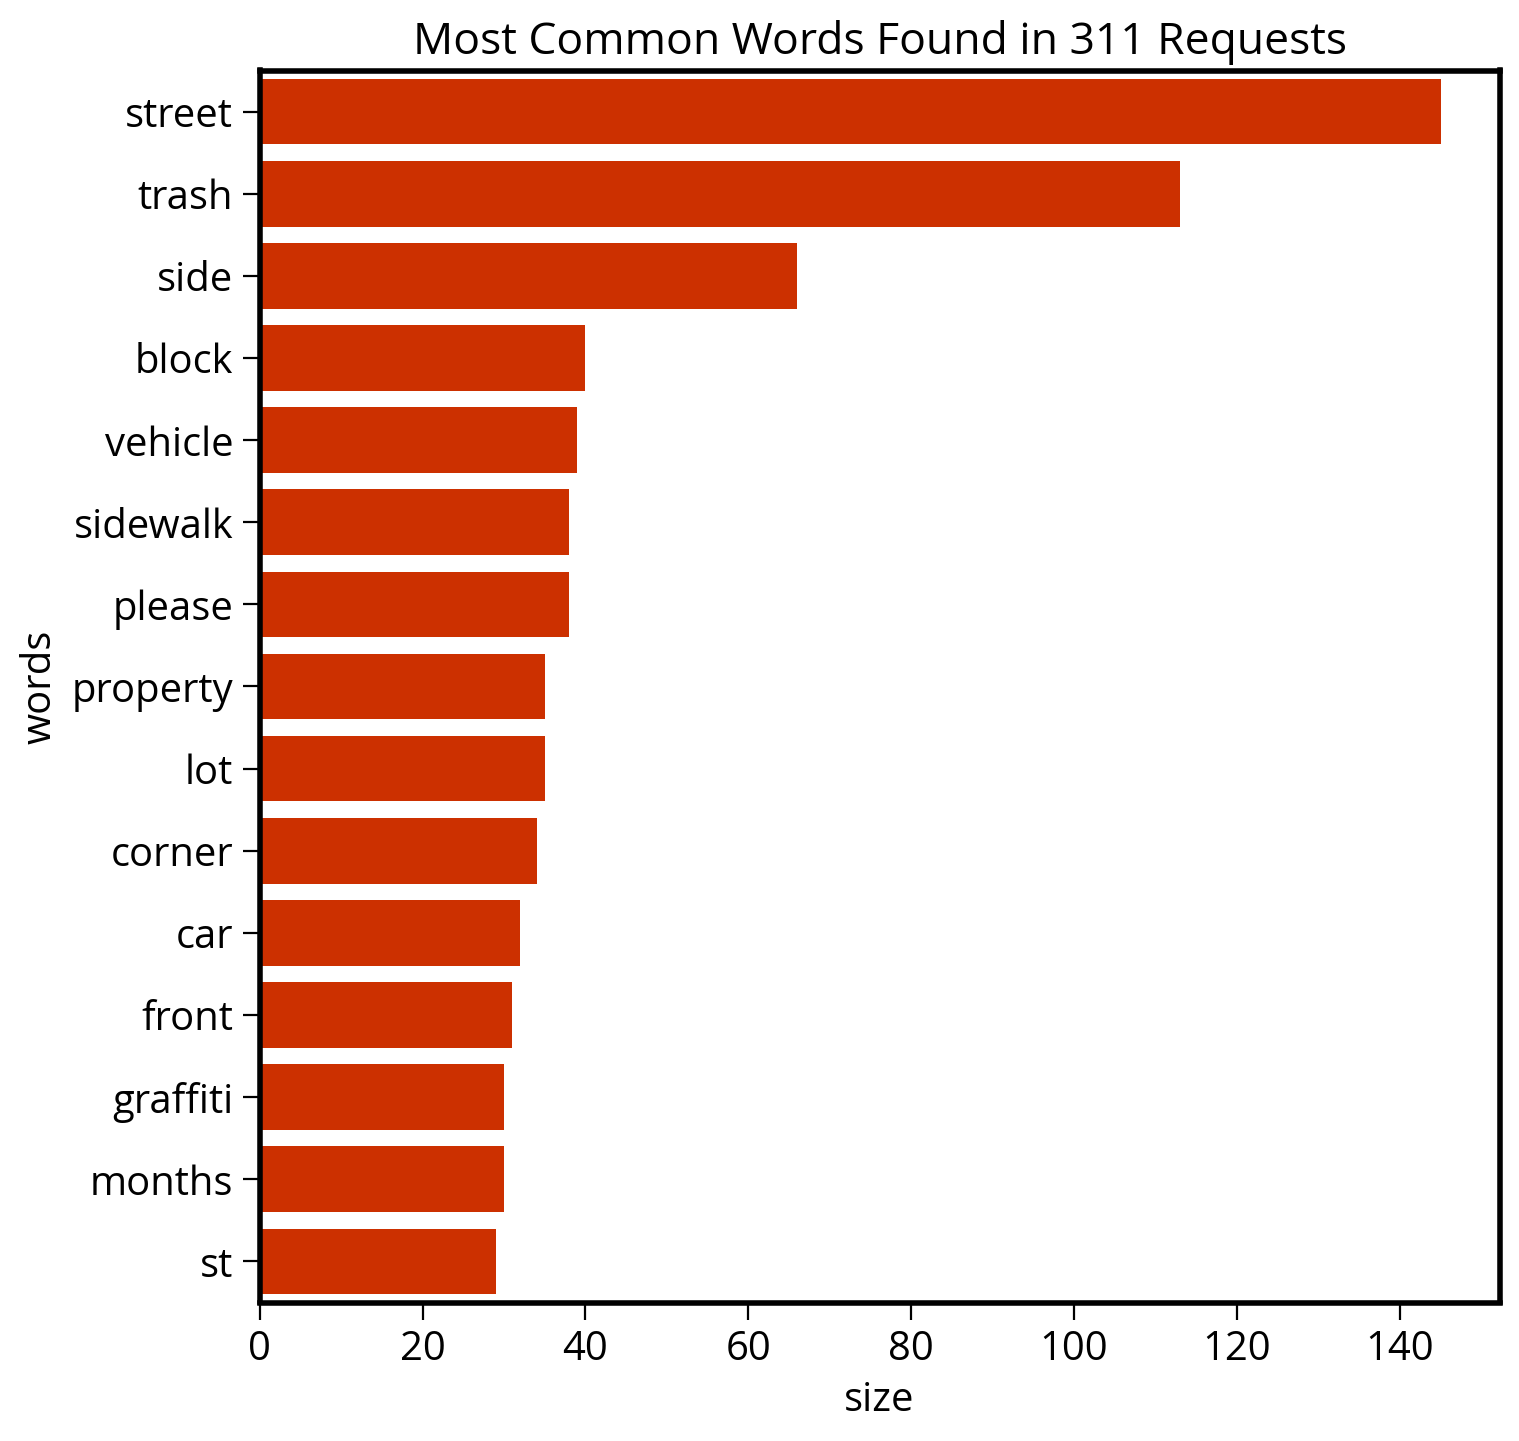

In [158]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
sns.barplot(
    y="words",
    x="size",
    data=top15,
    ax=ax,
    color="#cc3000",
    saturation=1.0,
)

ax.set_title("Most Common Words Found in 311 Requests", fontsize=16);

**Takeaway:** Philly cares about trash! They don't call it Filthadelphia for nothing...

## To be continued next time!

See you on Wednesday!